# Kelompok 6

1. Agung Malik Al Qindy
2. M.Nuril Haidar
3. Zhubair Abhel M.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans

Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.


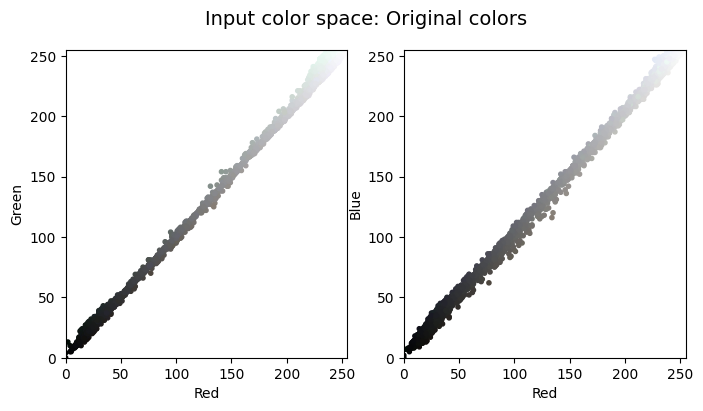

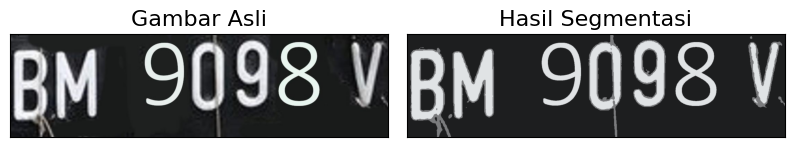

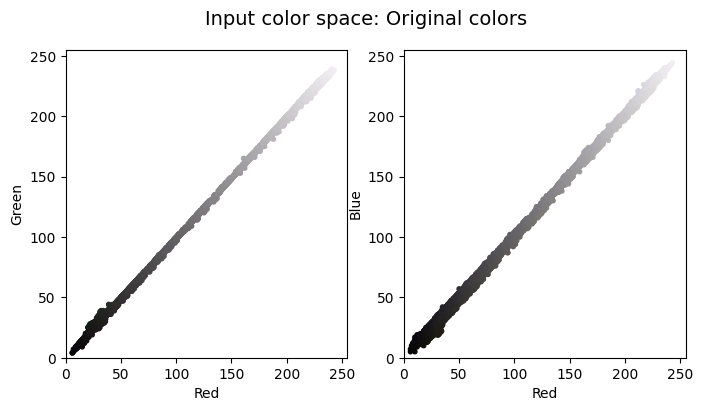

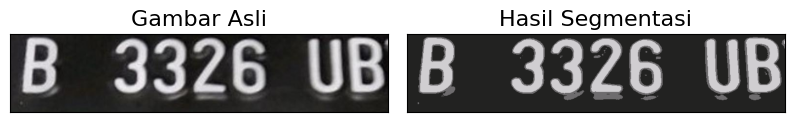

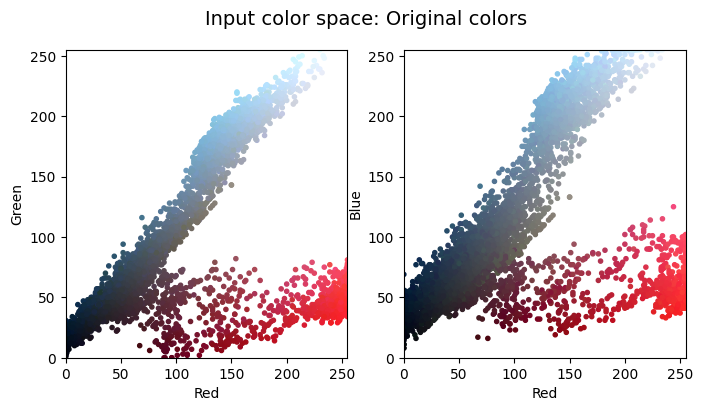

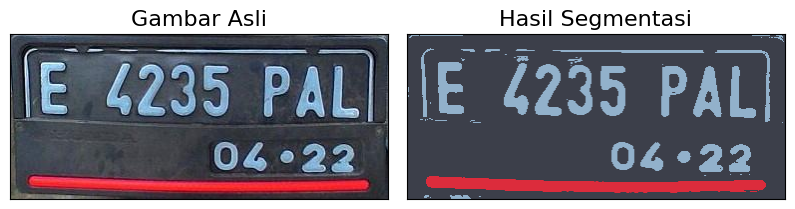

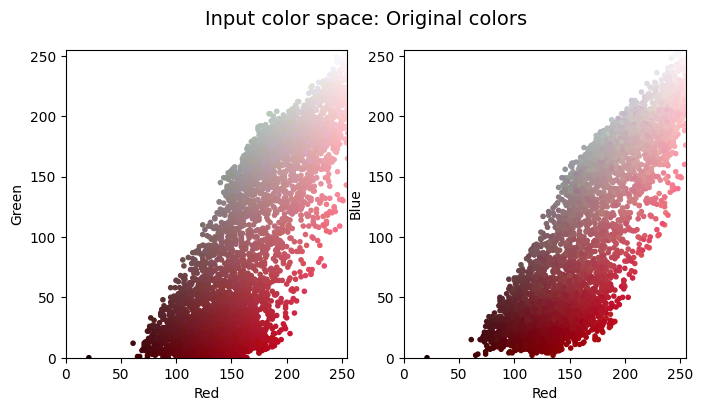

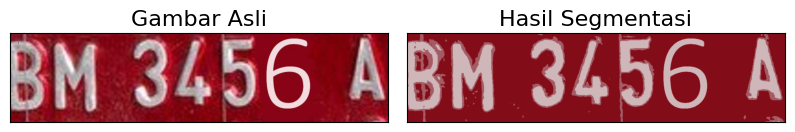

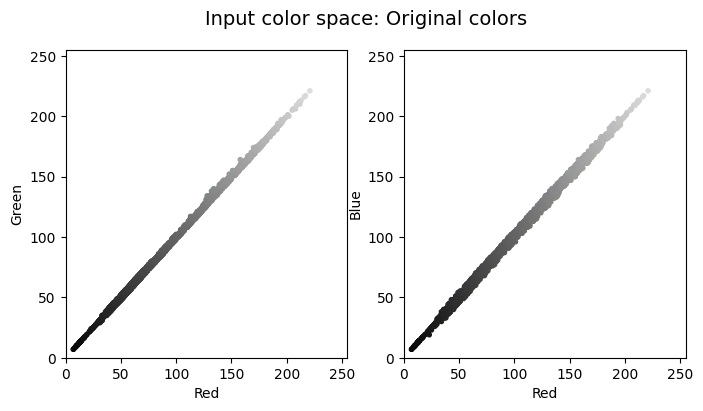

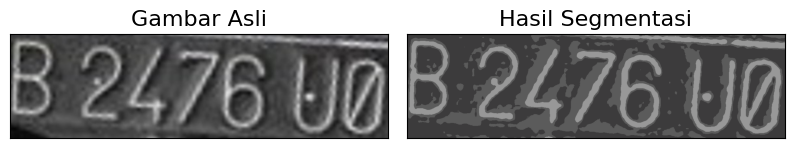

In [15]:
num_clusters = 3

directory = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 8/dummy"

# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Menyimpan gambar random dari file sebanyak 5
selected_images = random.sample(image_files, 5)

# Loop melalui setiap file gambar yang dipilih secara acak
for image_file in selected_images:
    # Dapatkan path lengkap ke file gambar
    image_path = os.path.join(directory, image_file)

    # Baca gambar
    img = cv2.imread(image_path)

    # Konversi gambar ke ruang warna RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, ch = img_rgb.shape

    data = img_rgb.reshape(h * w, ch)

    def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
            colors = data

        # Pilih subset data acak
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].scatter(R, G, c=colors/255.0, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

        ax[1].scatter(R, B, c=colors/255.0, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

        fig.suptitle(title, size=14)

    plot_pixels(data, title='Input color space: Original colors')

    # Mendefinisikan mode KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=1) # Jumlah cluster yang Anda inginkan

    # Fit data ke model k-means
    kmeans.fit(data)

    # Mendapatkan nilai titik tengah dari setiap cluster
    cluster_centers = kmeans.cluster_centers_

    # Tambahkan inisialisasi new_colors
    new_colors = cluster_centers[kmeans.labels_].reshape(img.shape)

    fig, ax = plt.subplots(1, 2, figsize=(10, 6),
                          subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)

    ax[0].imshow(img_rgb)
    ax[0].set_title('Gambar Asli', size=16)
    ax[1].imshow(new_colors.astype(np.uint8))
    ax[1].set_title('Hasil Segmentasi', size=16)

print("Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.")
